In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy

import math

# Sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
print(True)

True


In [9]:
day=pd.read_csv(r"/Users/sandraakunnaejiofor/Documents/CODE ACADEMY BERLIN/Capital_Bike_Project/day.csv",parse_dates=["dteday"])
hour=pd.read_csv(r"/Users/sandraakunnaejiofor/Documents/CODE ACADEMY BERLIN/Capital_Bike_Project/hour.csv",parse_dates=["dteday"])
trips_2011=pd.read_csv(r"/Users/sandraakunnaejiofor/Documents/CODE ACADEMY BERLIN/Capital_Bike_Project/2011-capitalbikeshare-tripdata.csv",parse_dates=["Start date","End date"])
#station_loc=pd.read_csv(r"/Users/sandraakunnaejiofor/Documents/CODE ACADEMY BERLIN/Capital_Bike_Project/Capital_Bike_Share_Locations_updated",delimiter=";")

In [10]:
# Bike trips 2011
files_2011=glob.glob("/Users/sandraakunnaejiofor/Documents/CODE ACADEMY BERLIN/Capital_Bike_Project/2011-capitalbikeshare-tripdata.csv")
trips_2011=pd.DataFrame()
for file in files_2011:
    data=pd.read_csv(file,parse_dates=["Start date","End date"])
    data["filename"]=file
    trips_2011=pd.concat([trips_2011,data])

In [14]:
trips=trips_2011.append(trips_2011)

/var/folders/1j/30cgkc_x275_pj48vlh0dgz00000gn/T/ipykernel_24076/25252535.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips=trips_2011.append(trips_2011)


In [15]:
trips.shape

(2453534, 10)

In [16]:
day.shape

(731, 16)

In [17]:
day.info()
day.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
hour.shape

(17379, 17)

In [20]:
hour.info()
hour.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [23]:
hour.loc[hour["season"]==1,"season_name"]="Winter"
hour.loc[hour["season"]==2,"season_name"]="Spring"
hour.loc[hour["season"]==3,"season_name"]="Summer"
hour.loc[hour["season"]==4,"season_name"]="Fall"

day.loc[day["season"]==1,"season_name"]="Winter"
day.loc[day["season"]==2,"season_name"]="Spring"
day.loc[day["season"]==3,"season_name"]="Summer"
day.loc[day["season"]==4,"season_name"]="Fall"

In [24]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453534 entries, 0 to 1226766
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   filename              object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 205.9+ MB


In [25]:
trips.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
filename                0
dtype: int64

In [26]:
trips.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
filename                0
dtype: int64

In [27]:
trips.drop(columns=["filename"],inplace=True)

DATE TIME

In [28]:
pd.to_datetime(hour["dteday"])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [29]:
pd.to_datetime(trips["Start date"])
pd.to_datetime(trips["End date"])

0         2011-01-01 01:00:37
1         2011-01-01 00:08:32
2         2011-01-01 00:15:36
3         2011-01-01 00:16:36
4         2011-01-01 00:32:19
                  ...        
1226762   2011-12-31 23:46:20
1226763   2011-12-31 23:53:10
1226764   2011-12-31 23:51:49
1226765   2012-01-01 00:29:33
1226766   2012-01-01 00:03:45
Name: End date, Length: 2453534, dtype: datetime64[ns]

In [30]:
trips["mnth"]=pd.DatetimeIndex(trips["Start date"]).month
trips["weekday"]=pd.DatetimeIndex(trips["Start date"]).weekday
trips["dteday"]=pd.DatetimeIndex(trips["Start date"]).date
trips["hour"]=trips["Start date"].dt.hour

In [31]:
# Day time
# Trips data set
trips["day_time"]=trips["hour"]

trips["day_time"]=np.where((trips["hour"]>=0)&(trips["hour"]<5),"Night",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=5)&(trips["hour"]<7),"Early morning",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=7)&(trips["hour"]<12),"Morning",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=12)&(trips["hour"]<17),"Afternoon",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=17)&(trips["hour"]<21),"Evening",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=21)&(trips["hour"]<24),"Night",trips["day_time"])


# Hour data set

hour["day_time"]=hour["hr"]

hour["day_time"]=np.where((hour["hr"]>=0)&(hour["hr"]<5),"Night",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=5)&(hour["hr"]<7),"Early morning",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=7)&(hour["hr"]<12),"Morning",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=12)&(hour["hr"]<17),"Afternoon",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=17)&(hour["hr"]<21),"Evening",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=21)&(hour["hr"]<24),"Night",hour["day_time"])

In [32]:
trips["dteday"]=pd.to_datetime(trips["dteday"])

In [33]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453534 entries, 0 to 1226766
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
 12  hour                  int64         
 13  day_time              object        
dtypes: datetime64[ns](3), int64(6), object(5)
memory usage: 280.8+ MB


In [34]:
# HOUR DF
hour["season_name"]=pd.Categorical(hour["season_name"],categories=("Winter","Spring","Summer","Fall"))
hour["is_holiday"]=hour["holiday"]
hour.loc[hour["is_holiday"]==1,"is_holiday"]="Yes"
hour.loc[hour["is_holiday"]==0,"is_holiday"]="No"
hour["is_holiday"]=pd.Categorical(hour["is_holiday"],categories=("Yes","No"))

#DAY DF

day["season_name"]=pd.Categorical(day["season_name"],categories=("Winter","Spring","Summer","Fall"))
day["is_holiday"]=day["holiday"]
day.loc[day["is_holiday"]==1,"is_holiday"]="Yes"
day.loc[day["is_holiday"]==0,"is_holiday"]="No"
day["is_holiday"]=pd.Categorical(day["is_holiday"],categories=("Yes","No"))


#TRIPS DF

trips["season"]=trips["mnth"]
trips["season_name"]=trips["season"]
trips["season_name"].replace({1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",9:"Fall",10:"Fall",11:"Fall",12:"Winter"},inplace=True)
trips["season_name"]=pd.Categorical(trips["season_name"],categories=("Winter","Spring","Summer","Fall"))

In [35]:
# Normalised values to meaningful values

# HOUR DF
hour["tem_cel"]=np.ceil(hour["temp"]*47-8).astype(int)
hour["atemp_cel"]=np.ceil(hour["temp"]*66-16).astype(int)
hour["windspeed_"]=np.ceil(hour["windspeed"]*67).astype(int)

# DAY DF
day["tem_cel"]=np.ceil(day["temp"]*47-8).astype(int)
day["atemp_cel"]=np.ceil(day["temp"]*66-16).astype(int)
day["windspeed_"]=np.ceil(day["windspeed"]*67).astype(int)

In [36]:
#weekday name

hour["day_name"]=hour["weekday"]
hour["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)
trips["day_name"]=trips["weekday"]
trips["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)

In [37]:
# Holiday colummn for "Trips" dataset
holiday_list=day[["dteday","holiday","is_holiday"]]
trips=pd.merge(trips,holiday_list,on="dteday",how="left")

In [38]:
trips.loc[trips["Member type"]=="Member","Member type"]="registered"
trips.loc[trips["Member type"]=="Casual","Member type"]="casual"

In [39]:
trips["route"]=trips["Start station"]+" - "+trips["End station"]

In [40]:
# Replace Unknown memeber type (<1%)
trips["Member type"].replace({"Unknown":"casual"},inplace=True)

In [41]:
trips.head(8)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,mnth,weekday,dteday,hour,day_time,season,season_name,day_name,holiday,is_holiday,route
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,5th & F St NW - 5th & F St NW
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,casual,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,14th & Harvard St NW - 14th & V St NW
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,Georgia & New Hampshire Ave NW - Adams Mill & ...
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,10th & U St NW - Florida Ave & R St NW
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,casual,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,Adams Mill & Columbia Rd NW - Calvert & Biltmo...
5,158,2011-01-01 00:32:33,2011-01-01 00:35:11,31605,3rd & D St SE,31618,4th & East Capitol St NE,W01033,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,3rd & D St SE - 4th & East Capitol St NE
6,560,2011-01-01 00:35:48,2011-01-01 00:45:09,31203,14th & Rhode Island Ave NW,31201,15th & P St NW,W00766,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,14th & Rhode Island Ave NW - 15th & P St NW
7,503,2011-01-01 00:36:42,2011-01-01 00:45:05,31203,14th & Rhode Island Ave NW,31201,15th & P St NW,W00506,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,14th & Rhode Island Ave NW - 15th & P St NW


In [42]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tem_cel,atemp_cel,windspeed_
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.872375,17.280166,13.239945
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.033183,12.696745,8.269943
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.000000,-14.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,8.000000,7.000000,8.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,16.000000,17.000000,13.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,24.000000,28.000000,17.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,39.000000,50.000000,57.000000


In [43]:
trips.describe()

,Duration,Start station number,End station number,mnth,weekday,hour,season,holiday
count,2.453534e+06,2.453534e+06,2.453534e+06,2.453534e+06,2.453534e+06,2.453534e+06,2.453534e+06,2.453534e+06
mean,1.179553e+03,3.128718e+04,3.128847e+04,7.150331e+00,3.001439e+00,1.419177e+01,7.150331e+00,2.417737e-02
std,2.475419e+03,1.933420e+02,1.924823e+02,2.932337e+00,2.006914e+00,5.067388e+00,2.932337e+00,1.535996e-01
min,6.000000e+01,3.100000e+04,3.100000e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.150000e+02,3.120000e+04,3.120000e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00
50%,6.830000e+02,3.122000e+04,3.122000e+04,7.000000e+00,3.000000e+00,1.500000e+01,7.000000e+00,0.000000e+00
75%,1.133000e+03,3.140100e+04,3.140100e+04,1.000000e+01,5.000000e+00,1.800000e+01,1.000000e+01,0.000000e+00
max,8.635500e+04,3.180600e+04,3.180600e+04,1.200000e+01,6.000000e+00,2.300000e+01,1.200000e+01,1.000000e+00


In [44]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453534 entries, 0 to 2453533
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
 12  hour                  int64         
 13  day_time              object        
 14  season                int64         
 15  season_name           category      
 16  day_name              object        
 17  holiday               int64         
 18  is_holiday            category      
 19  

In [45]:
# Weather score
hour["hum_score"]=hour["hum"]
hour["temp_score"]=hour["tem_cel"]
hour["wind_score"]=hour["windspeed_"]


hour["hum_score"]=np.where(hour["hum_score"]>=0.78,4,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.63)&(hour["hum_score"]<0.78),3,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.48)&(hour["hum_score"]<0.63),2,hour["hum_score"])
hour["hum_score"]=np.where(hour["hum_score"]<0.48,1,hour["hum_score"])


hour["temp_score"]=np.where((hour["temp_score"]>=0)&(hour["temp_score"]<10),3,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=10)&(hour["temp_score"]<16),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=25)&(hour["temp_score"]<30),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=16)&(hour["temp_score"]<25),1,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]>=30,4,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]<0,4,hour["temp_score"])


hour["wind_score"]=np.where((hour["wind_score"]>=0)&(hour["wind_score"]<13),1,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=13)&(hour["wind_score"]<25),2,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=25)&(hour["wind_score"]<39),3,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=39),4,hour["wind_score"])

hour["weather_score"]=((hour["temp_score"]*0.4)+(hour["hum_score"]*0.3)+(hour["wind_score"]*0.1)+(hour["weathersit"]*0.2))


#EDA

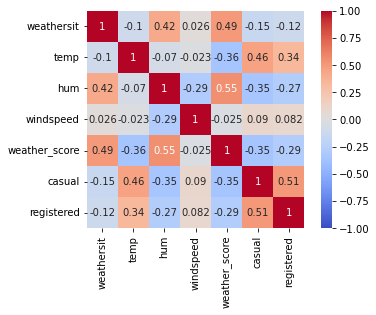

In [46]:
weather=hour[["weathersit","temp","hum","windspeed","weather_score","casual","registered"]].copy()

matrix_weather=weather.corr()

sns.heatmap(data=matrix_weather,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=True,annot=True )
plt.show()

In [47]:
hours_melt=pd.melt(hour,id_vars=["instant","dteday","day_name","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","tem_cel","atemp_cel","hum","windspeed_","is_holiday","weather_score","day_time"],value_vars=["casual","registered"])    

In [48]:
label=["Route","Count"]
routes_list=trips["route"].value_counts(dropna=False).rename_axis("Route").reset_index(name='Count')

#STATIONS

In [49]:
# Data frames for different day time
registered_morning=trips[(trips["day_time"]=="Morning")&(trips["Member type"]=="registered")]
registered_evening=trips[(trips["day_time"]=="Evening")&(trips["Member type"]=="registered")]
casual_afternoon=trips[(trips["day_time"]=="Afternoon")&(trips["Member type"]=="casual")]
casual_evening=trips[(trips["day_time"]=="Evening")&(trips["Member type"]=="casual")]

In [51]:
trips.groupby(["Start station","day_time"]).count()

Duration  Start date  End date  \
Start station                day_time                                        
10th & Monroe St NE          Afternoon          1026        1026      1026   
                             Early morning       234         234       234   
                             Evening             826         826       826   
                             Morning            2104        2104      2104   
                             Night               466         466       466   
...                                              ...         ...       ...   
Wisconsin Ave & Newark St NW Afternoon          3718        3718      3718   
                             Early morning       864         864       864   
                             Evening            3592        3592      3592   
                             Morning            5558        5558      5558   
                             Night              1404        1404      1404   

                                            Start station number  \
Start station                day_time                              
10th & Monroe St NE          Afternoon                      1026   
                             Early morning                   234   
                             Evening                         826   
                             Morning                        2104   
                             Night                           466   
...                                                          ...   
Wisconsin Ave & Newark St NW Afternoon                      3718   
                             Early morning                   864   
                             Evening                        3592   
                             Morning                        5558   
                             Night                          1404   

                                            End station number  End station  \
Start station                day_time                                         
10th & Monroe St NE          Afternoon                    1026         1026   
                             Early morning                 234          234   
                             Evening                       826          826   
                             Morning                      2104         2104   
                             Night                         466          466   
...                                                        ...          ...   
Wisconsin Ave & Newark St NW Afternoon                    3718         3718   
                             Early morning                 864          864   
                             Evening                      3592         3592   
                             Morning                      5558         5558   
                             Night                        1404         1404   

                                            Bike number  Member type  mnth  \
Start station                day_time                                        
10th & Monroe St NE          Afternoon             1026         1026  1026   
                             Early morning          234          234   234   
                             Evening                826          826   826   
                             Morning               2104         2104  2104   
                             Night                  466          466   466   
...                                                 ...          ...   ...   
Wisconsin Ave & Newark St NW Afternoon             3718         3718  3718   
                             Early morning          864          864   864   
                             Evening               3592         3592  3592   
                             Morning               5558         5558  5558   
                             Night                 1404         1404  1404   

                                            weekday  dteday  hour  season  \
Start station           